In [37]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Input,Model

# pack function to netwrok
from keras.layers.core import Lambda

# tensorflow 常用的功能
from keras import backend as K

sampling_dim = 2

def sampling(args):
    z_mean,z_log_var = args
    # 二元標準常態分配
    epsilon = K.random_normal(shape=(sampling_dim,),mean=0,stddev=1)
    return z_mean+K.exp(z_log_var/2)*epsilon

sample_layer = Lambda(sampling,output_shape=(sampling_dim,))

m = Input(shape =(sampling_dim,))
s = Input(shape =(sampling_dim,))

# why not concatenate? becase is Lambda
# input mean,varance get sample result
z = sample_layer([m,s])

sample_model = Model([m,s],z)
sample_model.summary()

test_mean = np.random.randint(10,size=sampling_dim).reshape(1,2)
test_log_var = np.array([[0,0]])

print("平均維 (%d, %d)"%(test_mean[0][0],test_mean[0][1]))
sample_model.predict([test_mean,test_log_var])

env: KERAS_BACKEND=tensorflow
Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           (None, 2)            0                                            
__________________________________________________________________________________________________
input_47 (InputLayer)           (None, 2)            0                                            
__________________________________________________________________________________________________
lambda_25 (Lambda)              (None, 2)            0           input_46[0][0]                   
                                                                 input_47[0][0]                   
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________
平

array([[7.449257, 9.811103]], dtype=float32)

Text(0.5, 1.0, 'Normal Random Sample using Keras/Numpy')

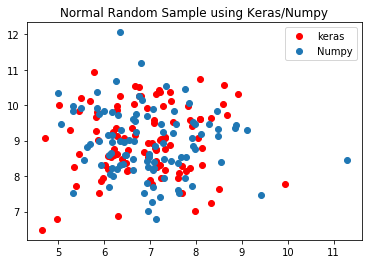

In [39]:
#compare with numpy func

num_of_samples=100
np_sample = np.random.multivariate_normal(test_mean[0],np.identity(2),size=num_of_samples)
keras_sample = np.zeros((num_of_samples,2))
for i in range(num_of_samples):
    keras_sample[i]=sample_model.predict([test_mean,test_log_var])

plt.plot(keras_sample[:,0],keras_sample[:,1],'ro')
plt.plot(np_sample[:,0],np_sample[:,1],'o')
plt.legend(['keras','Numpy'])
plt.title('Normal Random Sample using Keras/Numpy')